In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.stats.diagnostic import het_breuschpagan

In [8]:
data = pd.read_csv('data/Insurance.csv')

**The dataset has 6 predictor variables. `charges` is a response variable**

In [9]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
data.head(3)
data['children'] = data.children.astype('category')

**checking the missing values count for each variable**

In [6]:
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Histogram shows that the response variable is right skewed**

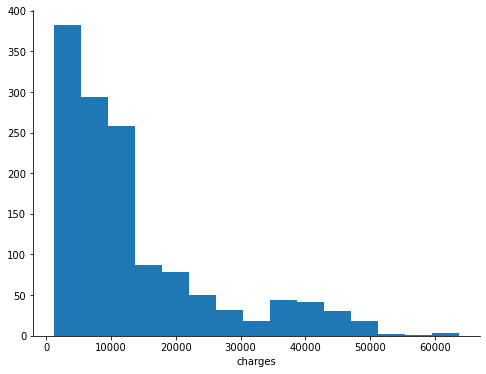

In [13]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(data['charges'], bins = 15)
ax.set_xlabel('charges')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

**Correlation coefficient shows that the numerical variables does not have significant correlation**

<AxesSubplot:>

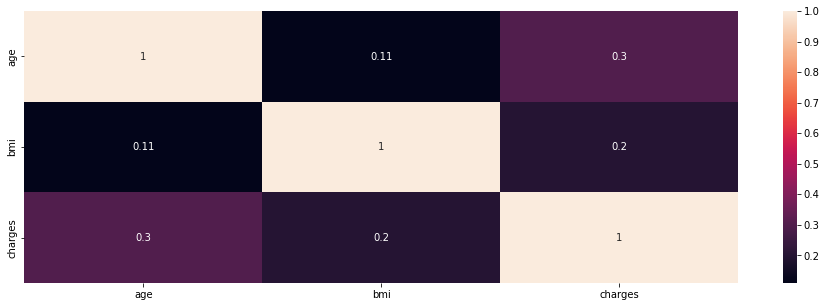

In [8]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

**Insurance charges are more for smoker compared to non smoker**

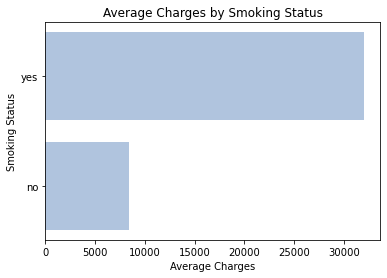

In [9]:
avg_charges_smoker = data.groupby('smoker').mean()['charges']
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(avg_charges_smoker.index, avg_charges_smoker, color='lightsteelblue')
plt.ylabel("Smoking Status")
plt.xlabel("Average Charges")
#plt.xticks(np.arange(2, 18, step=2))
plt.title("Average Charges by Smoking Status")
plt.show()

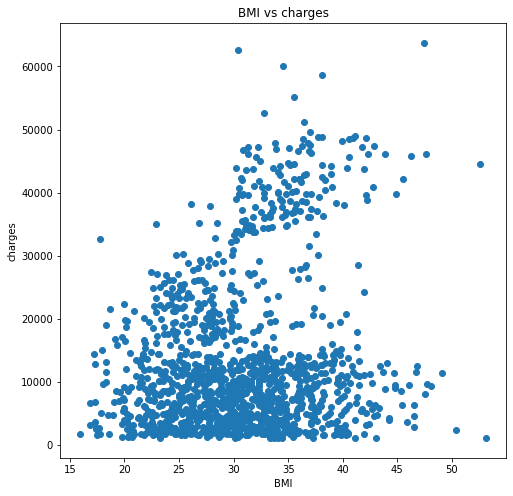

In [16]:
fig, ax = plt.subplots(figsize=(8,8)) 
ax.scatter(data['bmi'], data['charges'])
plt.title("BMI vs charges")
plt.ylabel("charges")
plt.xlabel("BMI")
plt.show()

**Not a very signifant difference in charges to male vs females, fair enough!**

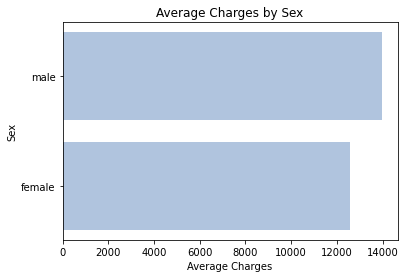

In [11]:
avg_charges_sex = data.groupby('sex').mean()['charges']
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(avg_charges_sex.index, avg_charges_sex, color='lightsteelblue')
plt.ylabel("Sex")
plt.xlabel("Average Charges")
#plt.xticks(np.arange(2, 18, step=2))
plt.title("Average Charges by Sex")
plt.show()

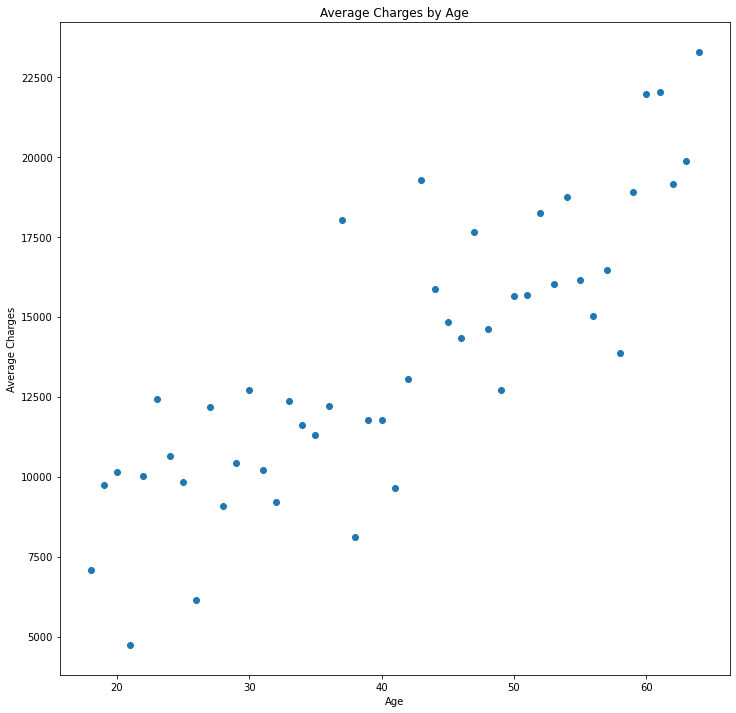

In [12]:
# not very related, get tested later (Not significant)
avg_charges_age = data.groupby('age').mean()['charges']

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(avg_charges_age.index, avg_charges_age)

plt.ylabel("Average Charges")
plt.xlabel("Age")
plt.title("Average Charges by Age")
plt.show()

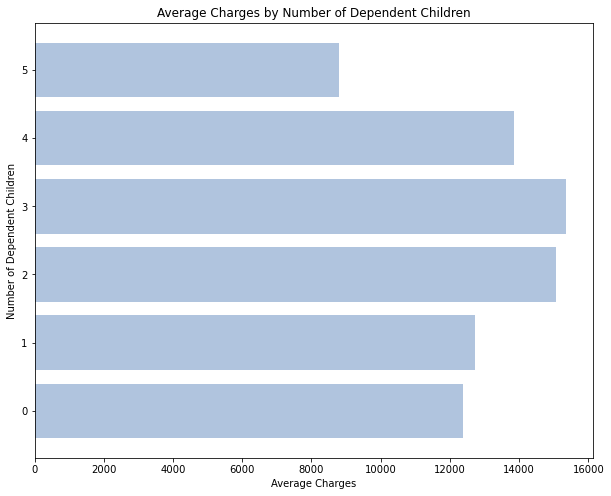

In [13]:
# not very related, get tested later (Not significant)
avg_charges_children = data.groupby('children').mean()['charges']

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(avg_charges_children.index, avg_charges_children, color='lightsteelblue')
plt.ylabel("Number of Dependent Children")
plt.xlabel("Average Charges")
#plt.xticks(np.arange(2, 18, step=2))
plt.title("Average Charges by Number of Dependent Children")
plt.show()

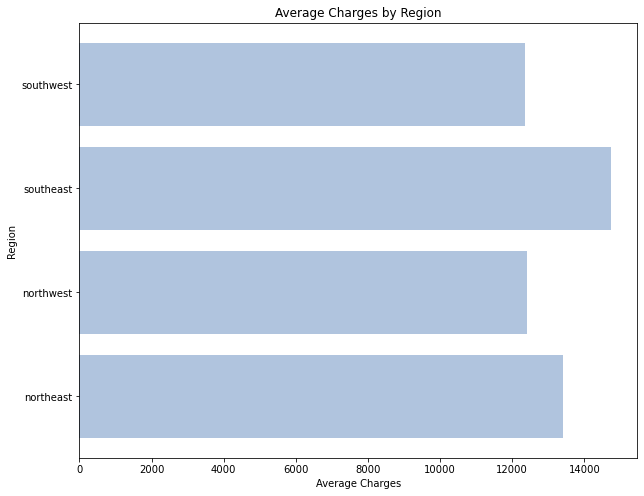

In [14]:
# not very related, get tested later (Not significant)
avg_charges_region = data.groupby('region').mean()['charges']

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(avg_charges_region.index, avg_charges_region, color='lightsteelblue')
plt.ylabel("Region")
plt.xlabel("Average Charges")
#plt.xticks(np.arange(2, 18, step=2))
plt.title("Average Charges by Region")
plt.show()

# Model 1

In [22]:
reg1 = smf.ols('charges~age+sex+bmi+children+smoker+region',data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:47:30   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.193e+04    993.657    -12.003      0.000   -1.39e+04   -9977.861
sex[T.male]          -128.1616    332.834     -0.385      0.700    -781.101     524.778
children[T.1]         390.9782    421.350      0.928      0.354    -435.608    1217.565
children[T.2]        1635.7772    466.670      3.505      0.000     720.284    2551.270
children[T.3]         964.3403    548.097      1.759      0.079    -110.893    2039.574
children[T.4]        2947.3680   1239.163      2.379      0.018     516.432    5378.304
children[T.5]        1116.0395   1456.015      0.767      0.444   -1740.307    3972.386
smoker[T.yes]        2.384e+04    414.139     57.557      0.000     2.3e+04    2.46e+04
region[T.northwest]  -380.0439    476.559     -0.797      0.425   -1314.936     554.848
region[T.southeast] -1033.1375    479.139     -2.156      0.031   -1973.091     -93.184
region[T.southwest]  -952.8878    478.153     -1.993      0.046   -1890.908     -14.867
age                   257.1933     11.914     21.587      0.000     233.820     280.567
bmi                   336.9088     28.612     11.775      0.000     280.779     393.039
==============================================================================
Omnibus:                      293.990   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.789
Skew:                           1.191   Prob(JB):                    8.15e-152
Kurtosis:                       5.609   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sm.stats.anova_lm(reg1, typ=1)
# insignificant for region and sex 

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.435902e+08,6.435902e+08,17.532341,3.011108e-05
children,5.0,2.394585e+09,4.789171e+08,13.046404,2.036612e-12
smoker,1.0,1.195787e+11,1.195787e+11,3257.498499,0.000000e+00
region,3.0,1.379901e+08,4.599671e+07,1.253018,2.891466e-01
age,1.0,1.959062e+10,1.959062e+10,533.677305,1.703240e-99
bmi,1.0,5.089679e+09,5.089679e+09,138.650315,1.641433e-30
Residual,1325.0,4.863908e+10,3.670874e+07,NaN,NaN


In [20]:
sm.stats.anova_lm(reg1, typ=2)
# insignificant for region and sex 

,sum_sq,df,F,PR(>F)
sex,5.442885e+06,1.0,0.148272,7.002538e-01
children,6.379964e+08,5.0,3.475992,3.987342e-03
smoker,1.216074e+11,1.0,3312.764072,0.000000e+00
region,2.264060e+08,3.0,2.055878,1.042786e-01
age,1.710575e+10,1.0,465.985849,8.446004e-89
bmi,5.089679e+09,1.0,138.650315,1.641433e-30
Residual,4.863908e+10,1325.0,NaN,NaN


# Model 2

In [176]:
reg2 = smf.ols('charges~age+bmi+children+smoker+region+sex',data=data).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:39:27   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.193e+04    993.657    -12.003      0.000   -1.39e+04   -9977.861
children[T.1]         390.9782    421.350      0.928      0.354    -435.608    1217.565
children[T.2]        1635.7772    466.670      3.505      0.000     720.284    2551.270
children[T.3]         964.3403    548.097      1.759      0.079    -110.893    2039.574
children[T.4]        2947.3680   1239.163      2.379      0.018     516.432    5378.304
children[T.5]        1116.0395   1456.015      0.767      0.444   -1740.307    3972.386
smoker[T.yes]        2.384e+04    414.139     57.557      0.000     2.3e+04    2.46e+04
region[T.northwest]  -380.0439    476.559     -0.797      0.425   -1314.936     554.848
region[T.southeast] -1033.1375    479.139     -2.156      0.031   -1973.091     -93.184
region[T.southwest]  -952.8878    478.153     -1.993      0.046   -1890.908     -14.867
sex[T.male]          -128.1616    332.834     -0.385      0.700    -781.101     524.778
age                   257.1933     11.914     21.587      0.000     233.820     280.567
bmi                   336.9088     28.612     11.775      0.000     280.779     393.039
==============================================================================
Omnibus:                      293.990   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.789
Skew:                           1.191   Prob(JB):                    8.15e-152
Kurtosis:                       5.609   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
sm.stats.anova_lm(reg2, typ=1)
# insignificant for region and sex 

,df,sum_sq,mean_sq,F,PR(>F)
children,5.0,2.396917e+09,4.793833e+08,13.059106,1.978563e-12
smoker,1.0,1.202177e+11,1.202177e+11,3274.907177,0.000000e+00
region,3.0,1.375861e+08,4.586202e+07,1.249349,2.904476e-01
sex,1.0,2.612225e+06,2.612225e+06,0.071161,7.896956e-01
age,1.0,1.959062e+10,1.959062e+10,533.677305,1.703240e-99
bmi,1.0,5.089679e+09,5.089679e+09,138.650315,1.641433e-30
Residual,1325.0,4.863908e+10,3.670874e+07,NaN,NaN


In [178]:
sm.stats.anova_lm(reg2, typ=2)
# insignificant for region and sex 

,sum_sq,df,F,PR(>F)
children,6.379964e+08,5.0,3.475992,3.987342e-03
smoker,1.216074e+11,1.0,3312.764072,0.000000e+00
region,2.264060e+08,3.0,2.055878,1.042786e-01
sex,5.442885e+06,1.0,0.148272,7.002538e-01
age,1.710575e+10,1.0,465.985849,8.446004e-89
bmi,5.089679e+09,1.0,138.650315,1.641433e-30
Residual,4.863908e+10,1325.0,NaN,NaN


# Model 3

In [24]:
reg = smf.ols('charges~age+bmi+children+smoker',data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.4
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:15:31   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.209e+04    947.781    -12.760      0.000    -1.4e+04   -1.02e+04
children[T.1]   368.7710    421.573      0.875      0.382    -458.250    1195.792
children[T.2]  1626.5095    466.561      3.486      0.001     711.233    2541.786
children[T.3]   996.9511    547.801      1.820      0.069     -77.697    2071.599
children[T.4]  2984.3586   1239.595      2.408      0.016     552.582    5416.135
children[T.5]   899.1294   1453.361      0.619      0.536   -1952.003    3750.262
smoker[T.yes]   2.38e+04    412.053     57.752      0.000     2.3e+04    2.46e+04
age             258.0760     11.912     21.665      0.000     234.707     281.445
bmi             319.8047     27.375     11.682      0.000     266.101     373.508
==============================================================================
Omnibus:                      294.840   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.185
Skew:                           1.195   Prob(JB):                    4.06e-152
Kurtosis:                       5.607   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
sm.stats.anova_lm(reg, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
children,5.0,2.396917e+09,4.793833e+08,13.036463,2.078944e-12
smoker,1.0,1.202177e+11,1.202177e+11,3269.228826,0.000000e+00
age,1.0,1.957035e+10,1.957035e+10,532.200720,2.605580e-99
bmi,1.0,5.018576e+09,5.018576e+09,136.476326,4.383973e-30
Residual,1329.0,4.887065e+10,3.677250e+07,NaN,NaN


In [26]:
sm.stats.anova_lm(reg, typ=2)

,sum_sq,df,F,PR(>F)
children,6.425648e+08,5.0,3.494812,3.833167e-03
smoker,1.226453e+11,1.0,3335.245907,0.000000e+00
age,1.725954e+10,1.0,469.360028,2.226815e-89
bmi,5.018576e+09,1.0,136.476326,4.383973e-30
Residual,4.887065e+10,1329.0,NaN,NaN


**Variance Inflation Factor**

In [27]:
y, X = dmatrices('charges~age+bmi+children+smoker', data=data, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor       features
0   32.685011      Intercept
1    1.186722  children[T.1]
2    1.165873  children[T.2]
3    1.130876  children[T.3]
4    1.025145  children[T.4]
5    1.020033  children[T.5]
6    1.006048  smoker[T.yes]
7    1.018469            age
8    1.013263            bmi


In [28]:
len(data)

1338

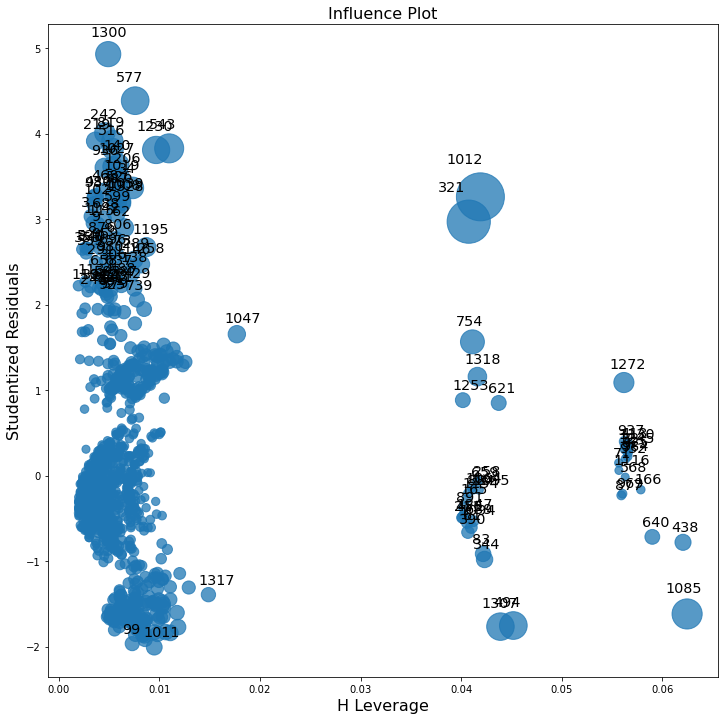

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(reg,ax=ax, criterion="cooks") 

**Checking influential points using cook's distance**

In [184]:
infl = reg.get_influence()
n = len(data)
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n

print(sum(atyp_cook))
print(('No.', 'Cook’s distances'))
for i in data[atyp_cook].index:
    print((i+1, reg_cook[i]))

80
('No.', 'Cook’s distances')
(4, 0.00327628031718459)
(10, 0.003936281891469084)
(35, 0.009251022573990934)
(63, 0.006104850376874999)
(70, 0.0031551658645515446)
(84, 0.004096662743755095)
(86, 0.003258839400066748)
(100, 0.003146850686297132)
(103, 0.003976723621708494)
(116, 0.003677284158428176)
(139, 0.0045199100224032245)
(141, 0.008693911187810335)
(220, 0.006155673124991775)
(236, 0.0033491570052920634)
(243, 0.008106494161734153)
(251, 0.004177405755587911)
(267, 0.003510235087190819)
(290, 0.005341243887631517)
(307, 0.003330888241093329)
(322, 0.04140922159812797)
(345, 0.004726057134452431)
(381, 0.003987898889007304)
(388, 0.006631031528859256)
(413, 0.004204784724623786)
(418, 0.0032346699241432675)
(430, 0.00401245814890737)
(431, 0.004302178005337164)
(439, 0.004478565086611531)
(469, 0.005419138441123764)
(489, 0.00336128568518892)
(495, 0.016147639240159464)
(517, 0.008665415289082119)
(527, 0.007279470213633651)
(544, 0.017870611838478625)
(574, 0.00421901577201318

# Check Assumption

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

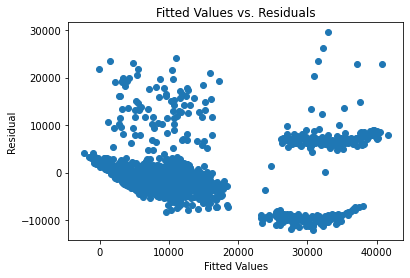

In [185]:
p2 = reg.fittedvalues
res = reg.resid
plt.scatter(p2,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [186]:
bp_test = het_breuschpagan(reg.resid, reg.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))
# Heteroskedasticity exists

{'LM Statistic': 128.35285338735062, 'LM-Test p-value': 6.208149148667009e-24}


**Normality: JB shows the normality is violated**

/Users/shubhamthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


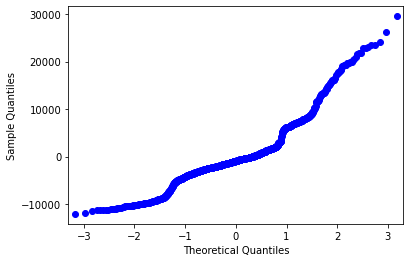

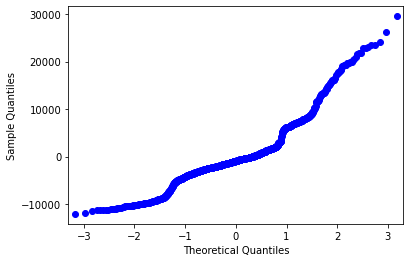

In [188]:
sm.qqplot(reg.resid)

# Weighted Least Square

In [189]:
y =np.array(data.charges)

In [190]:
residuals = (reg.fittedvalues - y)**2

In [191]:
data['residuals'] = residuals

In [192]:
reg_residuals = smf.ols('residuals~age+bmi+children+smoker',data=data).fit()
reg_residuals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     17.63
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.58e-25
Time:                        13:39:34   Log-Likelihood:                -26152.
No. Observations:                1338   AIC:                         5.232e+04
Df Residuals:                    1329   BIC:                         5.237e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.394e+07   1.17e+07      1.193      0.233   -8.99e+06    3.69e+07
children[T.1]  8.197e+06    5.2e+06      1.576      0.115      -2e+06    1.84e+07
children[T.2]  1.363e+07   5.75e+06      2.368      0.018    2.34e+06    2.49e+07
children[T.3] -3.004e+06   6.76e+06     -0.445      0.657   -1.63e+07    1.03e+07
children[T.4]  2.191e+07   1.53e+07      1.433      0.152   -8.09e+06    5.19e+07
children[T.5] -1.216e+07   1.79e+07     -0.678      0.498   -4.73e+07     2.3e+07
smoker[T.yes]  5.778e+07   5.08e+06     11.368      0.000    4.78e+07    6.77e+07
age           -1.588e+04   1.47e+05     -0.108      0.914   -3.04e+05    2.72e+05
bmi            2.299e+05   3.38e+05      0.681      0.496   -4.32e+05    8.92e+05
==============================================================================
Omnibus:                     1350.773   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54487.876
Skew:                           4.966   Prob(JB):                         0.00
Kurtosis:                      32.643   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Getting the weights array** 

In [193]:
fitted_residuals = reg_residuals.fittedvalues
weights = 1/fitted_residuals

In [194]:
data['smoker_dummy'] = pd.Series(np.where(data.smoker.values == 'yes', 1, 0),
          data.index)

X=np.asarray(data.iloc[:,[0,2,3,8]])
Y= np.asarray(data.iloc[:,[6]])
import statsmodels.api as sm

wls_model = sm.WLS(Y,X, weights= weights )
results = wls_model.fit()

In [195]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.850
Model:                            WLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              1896.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:39:39   Log-Likelihood:                         -13411.
No. Observations:                1338   AIC:                                  2.683e+04
Df Residuals:                    1334   BIC:                                  2.685e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           235.8653      9.082     25.969      0.000     218.048     253.683
x2           -36.2661     12.625     -2.873      0.004     -61.033     -11.500
x3           316.1644     98.638      3.205      0.001     122.661     509.668
x4          2.354e+04    558.415     42.147      0.000    2.24e+04    2.46e+04
==============================================================================
Omnibus:                      553.116   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2140.732
Skew:                           2.020   Prob(JB):                         0.00
Kurtosis:                       7.698   Cond. No.                         205.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

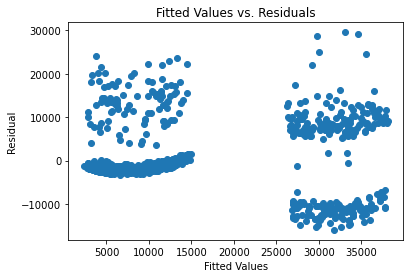

In [196]:
p2 = results.fittedvalues
res = results.resid
plt.scatter(p2,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [198]:
data_new = data[~atyp_cook]
len(data_new)

1258

In [197]:
data.shape

(1338, 9)

# After removing Influential Points

In [199]:
reg_clean = smf.ols('charges~age+bmi+children+smoker',data=data_new).fit()
reg_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     789.5
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:43:50   Log-Likelihood:                -12418.
No. Observations:                1258   AIC:                         2.485e+04
Df Residuals:                    1249   BIC:                         2.490e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.135e+04    771.065    -14.717      0.000   -1.29e+04   -9835.047
children[T.1]   -35.5796    333.966     -0.107      0.915    -690.775     619.616
children[T.2]  1416.3034    377.741      3.749      0.000     675.226    2157.381
children[T.3]   952.5492    438.513      2.172      0.030      92.245    1812.853
children[T.4]  1446.9056   1232.761      1.174      0.241    -971.606    3865.417
children[T.5]  2218.0274   1275.955      1.738      0.082    -285.225    4721.280
smoker[T.yes]  2.448e+04    337.370     72.565      0.000    2.38e+04    2.51e+04
age             254.4497      9.499     26.786      0.000     235.813     273.086
bmi             281.5452     22.488     12.520      0.000     237.428     325.663
==============================================================================
Omnibus:                       64.551   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.079
Skew:                           0.375   Prob(JB):                     3.77e-26
Kurtosis:                       4.292   Cond. No.                         498.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
y_clean =np.array(data_new.charges)

In [202]:
residuals_clean = (reg_clean.fittedvalues - y_clean)**2

data_new['residuals'] = residuals_clean

reg_residuals_clean = smf.ols('residuals~age+bmi+children+smoker',data=data_new).fit()
reg_residuals_clean.summary()

/var/folders/dk/33g3mdp15_99xjmt5cn7kk3c0000gn/T/ipykernel_18628/1365064724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['residuals'] = residuals_clean


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     76.59
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          8.05e-103
Time:                        13:47:01   Log-Likelihood:                -23550.
No. Observations:                1258   AIC:                         4.712e+04
Df Residuals:                    1249   BIC:                         4.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.651e+06   5.37e+06      1.238      0.216   -3.89e+06    1.72e+07
children[T.1]  1.698e+06   2.33e+06      0.730      0.466   -2.87e+06    6.26e+06
children[T.2] -4.188e+05   2.63e+06     -0.159      0.874   -5.58e+06    4.74e+06
children[T.3] -5.783e+06   3.05e+06     -1.893      0.059   -1.18e+07    2.11e+05
children[T.4] -1.017e+07   8.59e+06     -1.184      0.236    -2.7e+07    6.68e+06
children[T.5] -9.865e+06   8.89e+06     -1.110      0.267   -2.73e+07    7.57e+06
smoker[T.yes]  5.738e+07   2.35e+06     24.413      0.000    5.28e+07     6.2e+07
age            9129.2685   6.62e+04      0.138      0.890   -1.21e+05    1.39e+05
bmi            1.445e+05   1.57e+05      0.922      0.357   -1.63e+05    4.52e+05
==============================================================================
Omnibus:                     1222.444   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42406.327
Skew:                           4.710   Prob(JB):                         0.00
Kurtosis:                      29.838   Cond. No.                         498.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
fitted_residuals_clean = reg_residuals_clean.fittedvalues
weights_clean = 1/fitted_residuals_clean

In [204]:
data_new['smoker_dummy'] = pd.Series(np.where(data_new.smoker.values == 'yes', 1, 0),
          data_new.index)

X_clean=np.asarray(data_new.iloc[:,[0,2,3,8]])
Y_clean= np.asarray(data_new.iloc[:,[6]])
import statsmodels.api as sm

wls_model_clean = sm.WLS(Y_clean,X_clean, weights= weights_clean )
results_clean = wls_model_clean.fit()

/var/folders/dk/33g3mdp15_99xjmt5cn7kk3c0000gn/T/ipykernel_18628/1037214679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['smoker_dummy'] = pd.Series(np.where(data_new.smoker.values == 'yes', 1, 0),


In [205]:
results_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            WLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              3489.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:47:31   Log-Likelihood:                         -12103.
No. Observations:                1258   AIC:                                  2.421e+04
Df Residuals:                    1254   BIC:                                  2.424e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           238.2296      5.930     40.171      0.000     226.595     249.864
x2           -56.7657      8.279     -6.857      0.000     -73.007     -40.524
x3           180.1596     45.571      3.953      0.000      90.755     269.564
x4          2.441e+04    515.437     47.350      0.000    2.34e+04    2.54e+04
==============================================================================
Omnibus:                      617.036   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3753.298
Skew:                           2.238   Prob(JB):                         0.00
Kurtosis:                      10.181   Cond. No.                         307.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

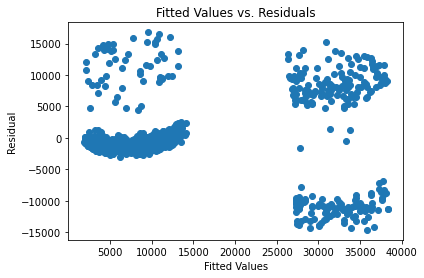

In [207]:
p2 = results_clean.fittedvalues
res = results_clean.resid
plt.scatter(p2,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")